 # Example analysis for the Bragg experiment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 20})


## Microwave diffraction

### first load the microwave file from Drive

This will be a text file which is "tab delimited", and contains many rows and columns.  The number of rows/columns is related to the number of $\alpha$ and $\beta$ measurements for each pull you "saved".  

Note that you did not pick the number of $\alpha$ angles - the labview program did.  It used an interpolation of your pull and produced 0.5 degree steps over the $\alpha$ range (0 to 90.5 degrees), so you should have 181 numbers for alpha for each $\beta$.   This will help you figure out whether rows or columns are "$\alpha$".

In the test file imported here (which I borrowed as a jpeg from this [nice page](https://blinq.art/blog/black-white-photography-the-difference-between-good-and-great/), and converted to a text file), this is not the case, so I have made up some numbers for "alpha" and "beta" - hopefully you don't mind.



In [12]:

microwave = np.genfromtxt('/content/drive/MyDrive/Starter Notebooks for 315 labs/Electron Diffraction/test.txt',dtype=float)

print(microwave.shape) # print the shape so you know which dimension is which.  The alpha dimension should be about 180 (since it is 90 degrees in 0.5 degree steps)
  

(680, 1020)


### Create matrices corresponding to alpha and beta values for each pixel for plotting

You have to do this in order to have the real numbers for $\alpha$ and $\beta$ on your axes.

NOTE: you must change the size and number of $\alpha$ and $\beta$ steps below to match what you actually collected.  $\alpha$ steps are determined by the interpolation of each of your "pull", and is 0.5 degrees (as mentioned above).  $\beta$ steps and range were up to you, but it is typically chosen in 1 degree steps.

In [13]:
dbeta, dalpha = 1., 1.
alpha, beta = np.mgrid[slice(0, 680, dalpha), 
                slice(0, 1020, dbeta)]

print(alpha.shape) 
print(beta.shape)                     

(680, 1020)
(680, 1020)


### plot the data as a color plot with the ability to add predicted points on top

The color scheme for the plot is up to you!  Pick one you like from the options here:  https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html


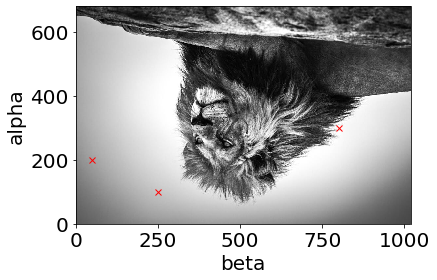

In [14]:
fig = plt.figure()
ax = fig.gca()               

ax.pcolormesh(beta,alpha,microwave,cmap='gist_gray')  # note that gist_gray is just one color scheme you could use.

plt.xlabel('beta')
plt.ylabel('alpha')

# these are some "predicted values" - hopefully will be better than the predicitons here :)
x = np.array([250,50, 800])
y = np.array([100, 200, 300])

ax.plot(x,y,'rx',zorder=1)  # zorder = 1 keeps the points on top of the image rather than behind it

### note: the HIDDEN cells and info below are not required for your data, but is just a little explanation of what you are seeing above.  You can delete it when you make your own notebook based on this starter



Why is the image upside down?!  
This is a "fun" thing about image files, they are not written into files in the order we would typically assume based on our exerience with matrices.  **It's not relevant to your lab though, so don't worry about it**, but if you're interested, you can flip the image when plotting it by using numpy's "flipud" on the image data, to flip it upside down.

```
np.flipud(microwave)
```

as below


Text(0, 0.5, 'alpha')

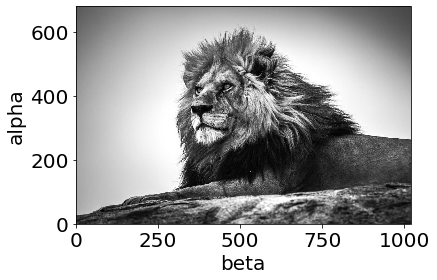

In [16]:
fig = plt.figure()
ax = fig.gca()               

ax.pcolormesh(beta,alpha,np.flipud(microwave),cmap='gist_gray')

plt.xlabel('beta')
plt.ylabel('alpha')


# Electron diffraction
For this part, you need to read in a file of (or manually input as an array) your electron diffraction data.  Typically this is a bunch of voltage values (in kV) and the accompanying ring diameters (in cm perhaps).

You'll need to think about how to combine repeated data to produce a best estimate and uncertainty for each point.  Hint: refer to Ch. 4 of Taylor!

You will want to graph and fit a model your results in a way that lets you confirm the wave-nature of electrons.  Hint: Use a straight line relationship whenever possible!  i.e. Linearize your data and model!


